In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from scipy.stats import skew, kurtosis, shapiro
# Đọc lại file CSV
data = pd.read_csv("C:\\Users\\phamt\\Downloads\\cleaning_data.csv")
data ['Count'] = 1
dfage = data.groupby('Age Range', as_index=False)['Count'].sum()

In [2]:
dfage

,Age Range,Count
0,0 to 9 years,2954
1,10 to 19 years,10033
2,20 to 24 years,3063
3,25 to 34 years,8864
4,35 to 44 years,9625
5,45 to 54 years,6006
6,55 to 59 years,2241
7,60 to 64 years,1969
8,65 to 74 years,3921
9,75 years and over,2622


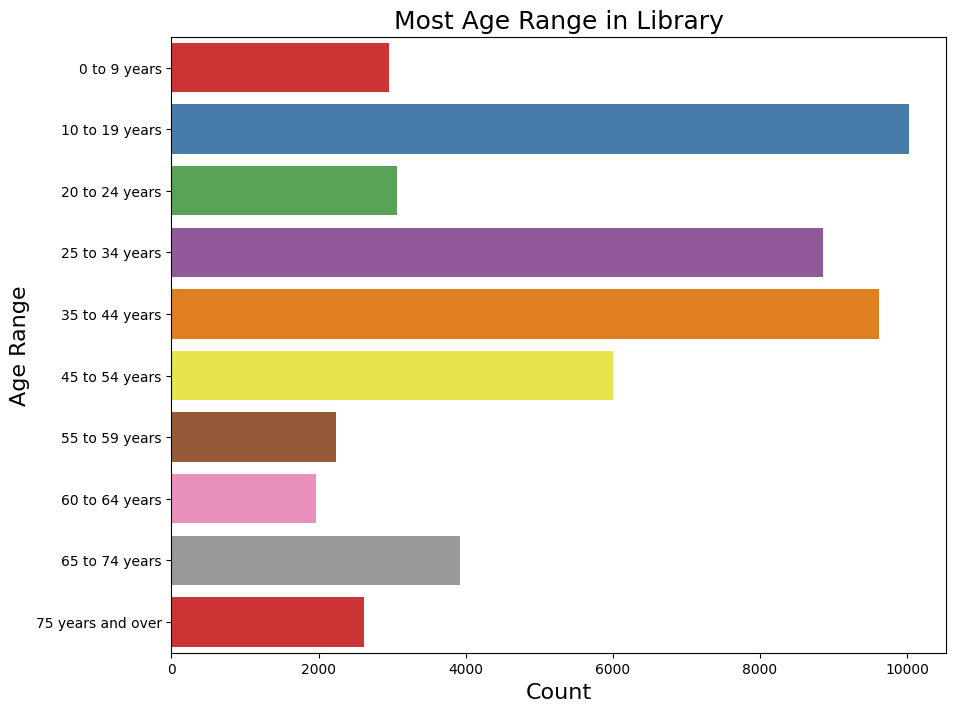

In [3]:

#Show Bar Chart
plt.figure(figsize=(10,8))
sns.barplot(data=dfage, x='Count', y='Age Range', palette='Set1')
plt.title('Most Age Range in Library', fontsize=18)
plt.xlabel ('Count', fontsize=16)
plt.ylabel ('Age Range', fontsize=16)

# Hiển thị biểu đồ
plt.show()

Text(0.5, 1.0, 'Average Score for Age Range, by Total Checkouts')

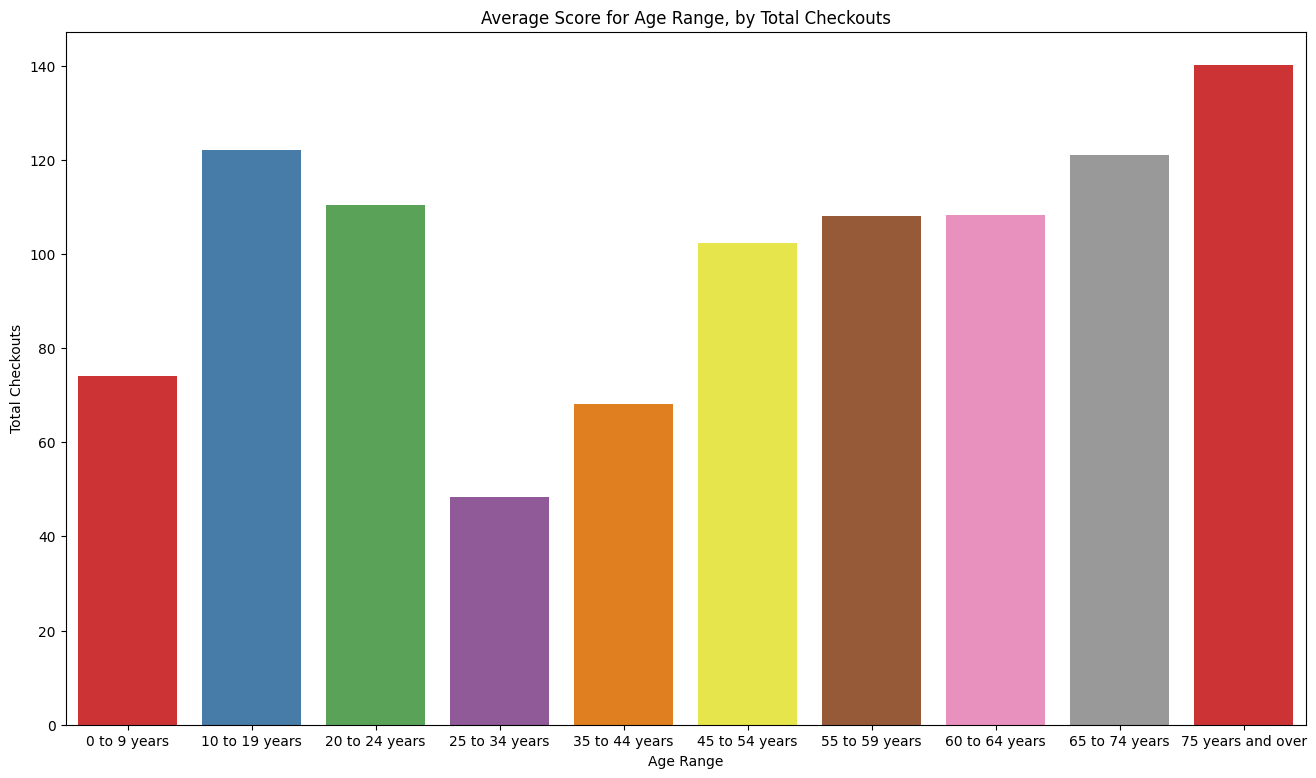

In [4]:
df_avg_checkouts = data.groupby('Age Range')['Total Checkouts'].mean().reset_index()
# Bar chart showing average score 
plt.figure(figsize=(16, 9))
sns.barplot(y=df_avg_checkouts['Total Checkouts'], x=df_avg_checkouts['Age Range'], palette='Set1', legend=False)
# Add label for horizontal axis
#plt.xlabel("")
# Add label for vertical axis
plt.title("Average Score for Age Range, by Total Checkouts")

In [5]:
# Xu hướng chung: Nhìn chung, biểu đồ cho thấy số lần mượn sách trung bình có xu hướng tăng lên khi độ tuổi tăng, đạt đỉnh ở nhóm tuổi 75 trở lên. 
# Điều này có thể cho thấy những người lớn tuổi có xu hướng mượn sách nhiều hơn so với các nhóm tuổi khác.
# Có sự khác biệt đáng kể về số lần mượn sách trung bình giữa các nhóm tuổi. Ví dụ, nhóm tuổi 75 trở lên có số lần thanh toán cao gấp gần 2 lần so với nhóm tuổi 35-44 , gần gấp 3 so với nhóm tuổi 25 đến 34

Text(0.5, 1.0, 'Average Score for Age Range, by Total Renewables')

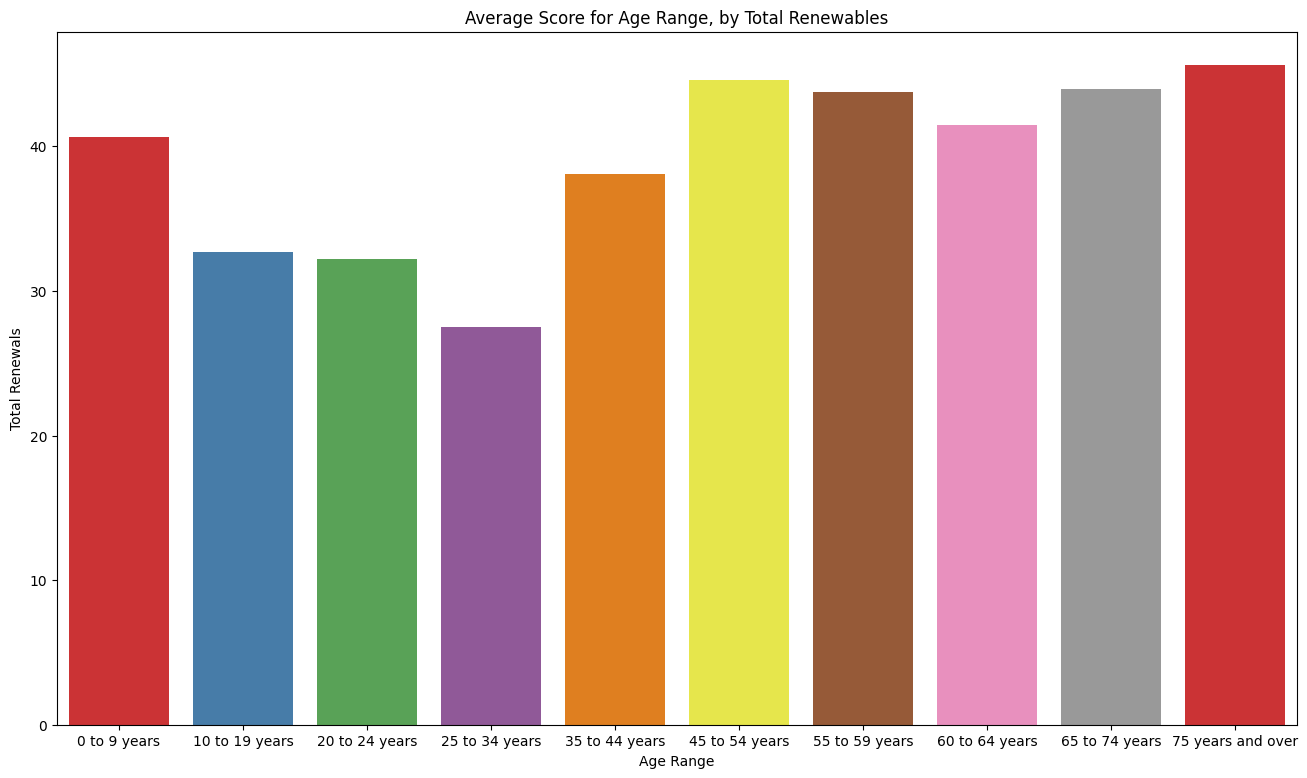

In [6]:
df_avg = data.groupby('Age Range')['Total Renewals'].mean().reset_index()
# Bar chart showing average score 
plt.figure(figsize=(16, 9))
sns.barplot(y=df_avg['Total Renewals'], x=df_avg['Age Range'], palette='Set1', legend=False)
# Add label for horizontal axis
#plt.xlabel("")
# Add label for vertical axis
plt.title("Average Score for Age Range, by Total Renewables")

In [7]:
# Biểu đồ cho thấy số lượt gia hạn mượn sách trung bình có xu hướng tăng lên khi độ tuổi tăng, với nhóm tuổi 75 trở lên có số lượt gia hạn cao nhất. Điều này cho thấy rằng những người lớn tuổi có thể có nhu cầu gia hạn mượn sách cao hơn.
# Nhóm tuổi 75 trở lên có số lượt gia hạn trung bình cao nhất, gần gấp đôi so với nhóm tuổi 25-34, nhóm có số lượt gia hạn mượn sách thấp nhất.
# Các nhóm trẻ tuổi có số lượt gia hạn thấp hơn, có thể do hạn chế tài chính hoặc nhu cầu gia hạn mượn sách ít hơn.

In [8]:
dfpatron = data.groupby('Patron Type Definition', as_index=False)['Count'].sum()
dfpatron

,Patron Type Definition,Count
0,Adult,32634
1,Juvenile,5934
2,Senior,6479
3,Teen,6251


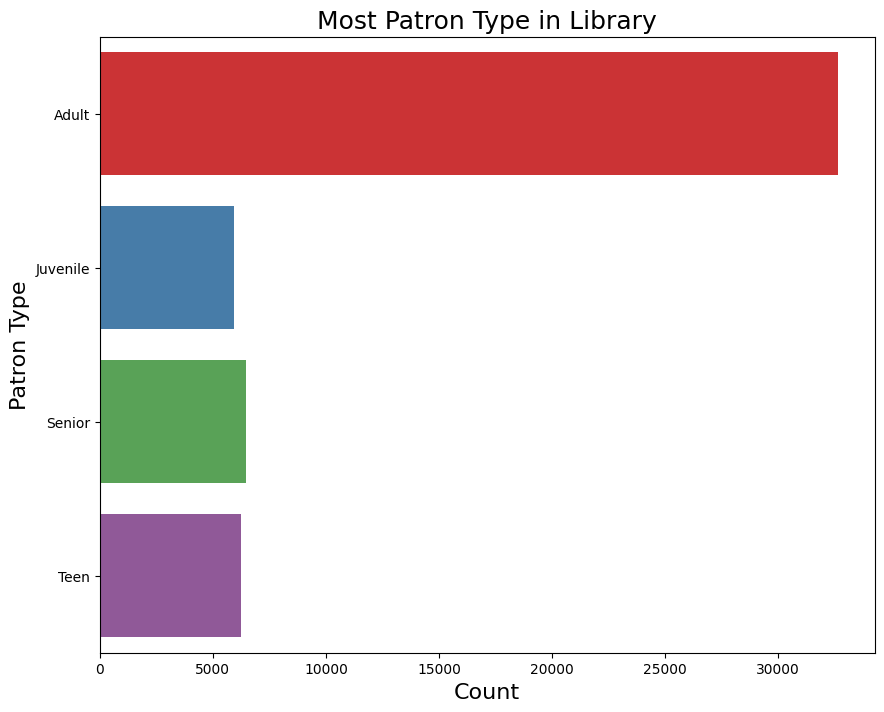

<Figure size 640x480 with 0 Axes>

In [9]:
#Show Bar Chart
plt.figure(figsize=(10,8))
sns.barplot(data=dfpatron, x='Count', y='Patron Type Definition',palette='Set1')
plt.title('Most Patron Type in Library', fontsize=18)
plt.xlabel ('Count', fontsize=16)
plt.ylabel ('Patron Type', fontsize=16)
plt.show()
plt.savefig('patron_type_chart.png', format='png')


In [10]:
# Biểu đồ cho thấy nhóm đối tượng "Adult" (Người lớn) có số lượng cao nhất, vượt xa các nhóm khác với con số trên 30,000 lượt. Điều này gợi ý rằng người lớn là đối tượng khách hàng chủ yếu của thư viện
# Nhóm "Adult": Số lượng người lớn sử dụng thư viện rất cao, có thể do nhiều lý do như nhu cầu đọc sách nghiên cứu, giải trí hay sự thuận tiện khi sử dụng thư viện.
# Juvenile(Trẻ em) ít sử dụng thư viện hơn so với các nhóm tuổi khác.

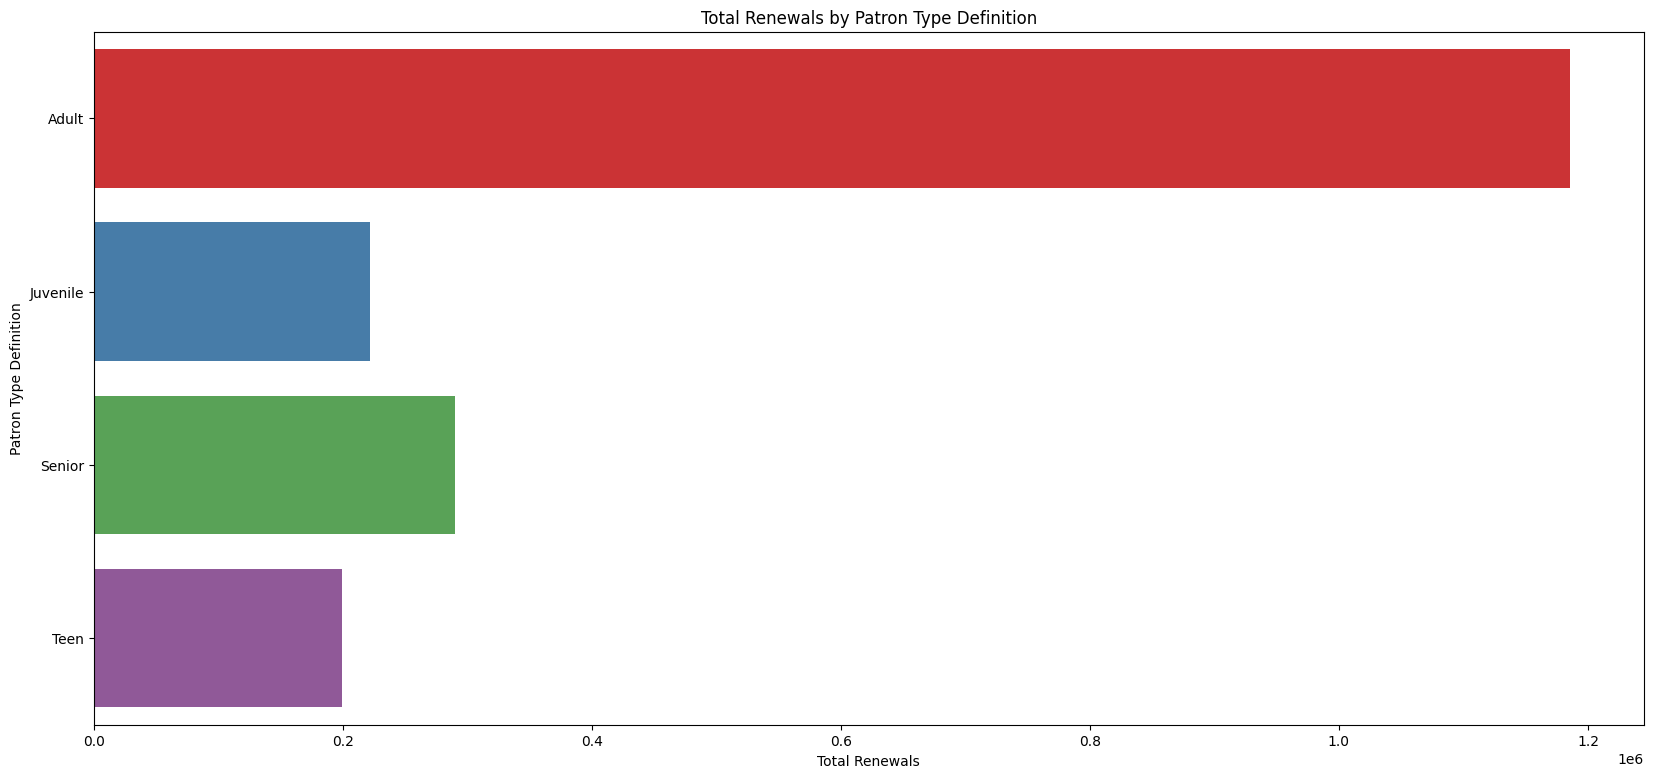

In [11]:
# Nhóm theo Patron Type Definition và tính tổng số Total Renewals
df_renewals = data.groupby('Patron Type Definition')['Total Renewals'].sum().reset_index()

# Vẽ biểu đồ thanh
plt.figure(figsize=(20, 9))
sns.barplot(x='Total Renewals', y='Patron Type Definition', data=df_renewals, palette='Set1')

# Thêm tiêu đề cho biểu đồ
plt.title("Total Renewals by Patron Type Definition")
plt.xlabel("Total Renewals")
plt.ylabel("Patron Type Definition")
plt.show()


In [12]:
# Nhóm Adult có số lần gia hạn cao nhất, trong khi nhóm Juvenile có số lần gia hạn thấp nhất. Điều này có thể chỉ ra rằng người trưởng thành sử dụng dịch vụ thư viện nhiều hơn hoặc cần gia hạn sách nhiều hơn so với các nhóm tuổi khác
# Người trưởng thành sử dụng thư viện nhiều hơn: Nhóm người trưởng thành có thể thường xuyên sử dụng thư viện, dẫn đến nhu cầu gia hạn sách hoặc tài liệu cao hơn so với các nhóm tuổi khác.
# Sự cần thiết gia hạn: Người trưởng thành có thể mượn nhiều tài liệu hơn hoặc các tài liệu mượn có thời gian sử dụng dài hơn, dẫn đến việc gia hạn nhiều lần hơn.

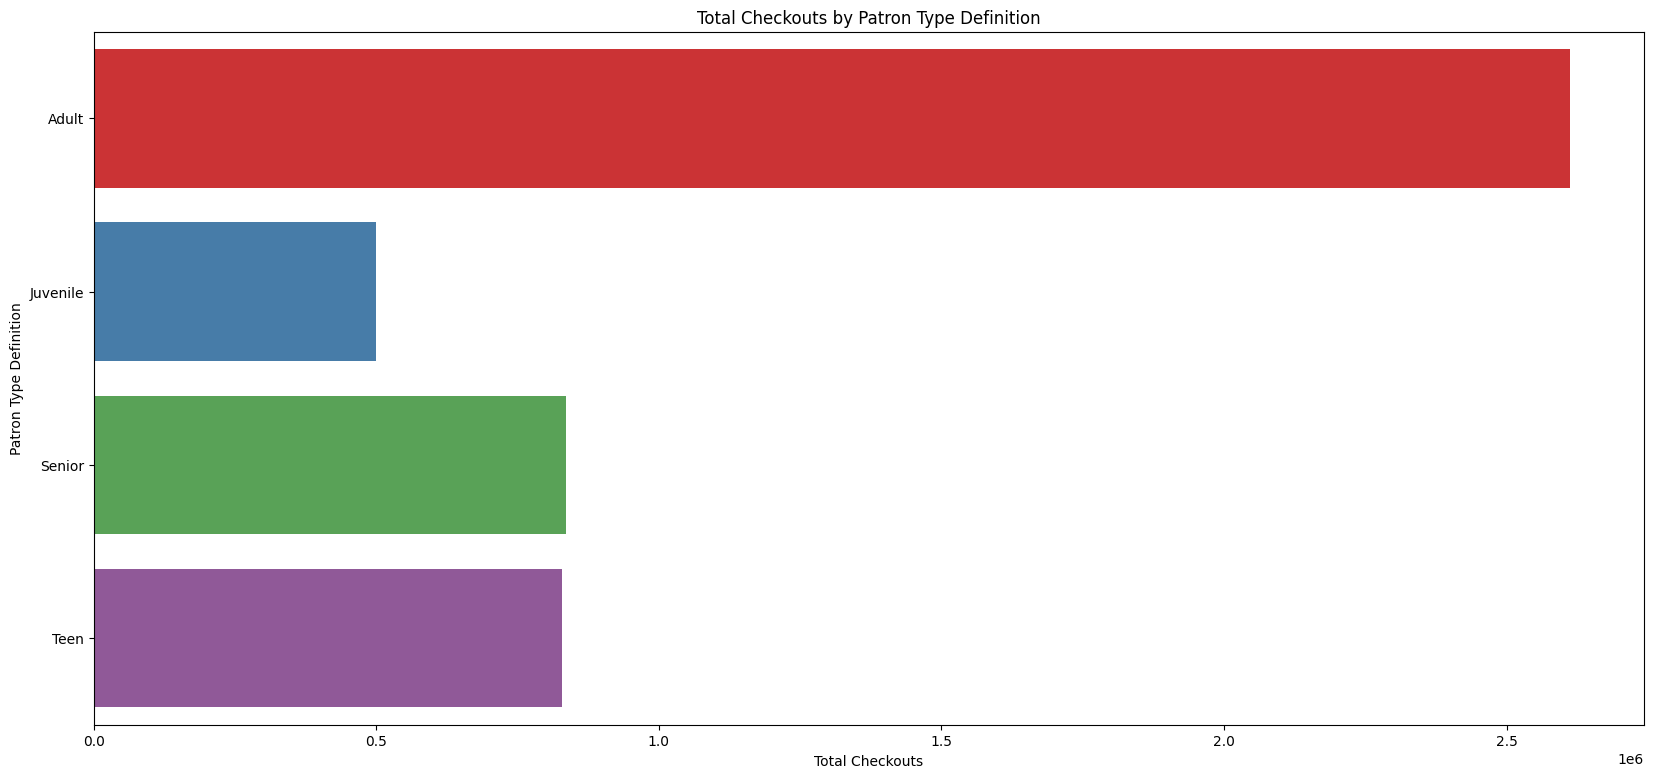

In [13]:
# Nhóm theo Patron Type Definition và tính tổng số Total Checkouts
df_checkouts = data.groupby('Patron Type Definition')['Total Checkouts'].sum().reset_index()

# Vẽ biểu đồ thanh
plt.figure(figsize=(20, 9))
sns.barplot(x='Total Checkouts', y='Patron Type Definition', data=df_checkouts, palette='Set1')

# Thêm tiêu đề cho biểu đồ
plt.title("Total Checkouts by Patron Type Definition")
plt.xlabel("Total Checkouts")
plt.ylabel("Patron Type Definition")
plt.show()

In [14]:
# Nhóm "Adult" có số lượt mượn sách cao nhất , Điều này chỉ ra rằng người lớn là nhóm khách hàng chủ yếu của thư viện, có thể do nhu cầu cao về tài liệu nghiên cứu, giải trí và học tập.
# Thanh thiếu niên có số lượt mượn sách tương đối cao, cho thấy thư viện là một nguồn tài nguyên quan trọng cho việc học tập và giải trí. Nhưng họ lại gia hạn mượn sách thì thấp nhất
# Thiếu nhi (Juvenile) là nhóm có số lượt mượn sách ít nhất
# =>Thư viện nên tập trung vào việc cung cấp các tài liệu phù hợp với nhu cầu của người trưởng thành. 

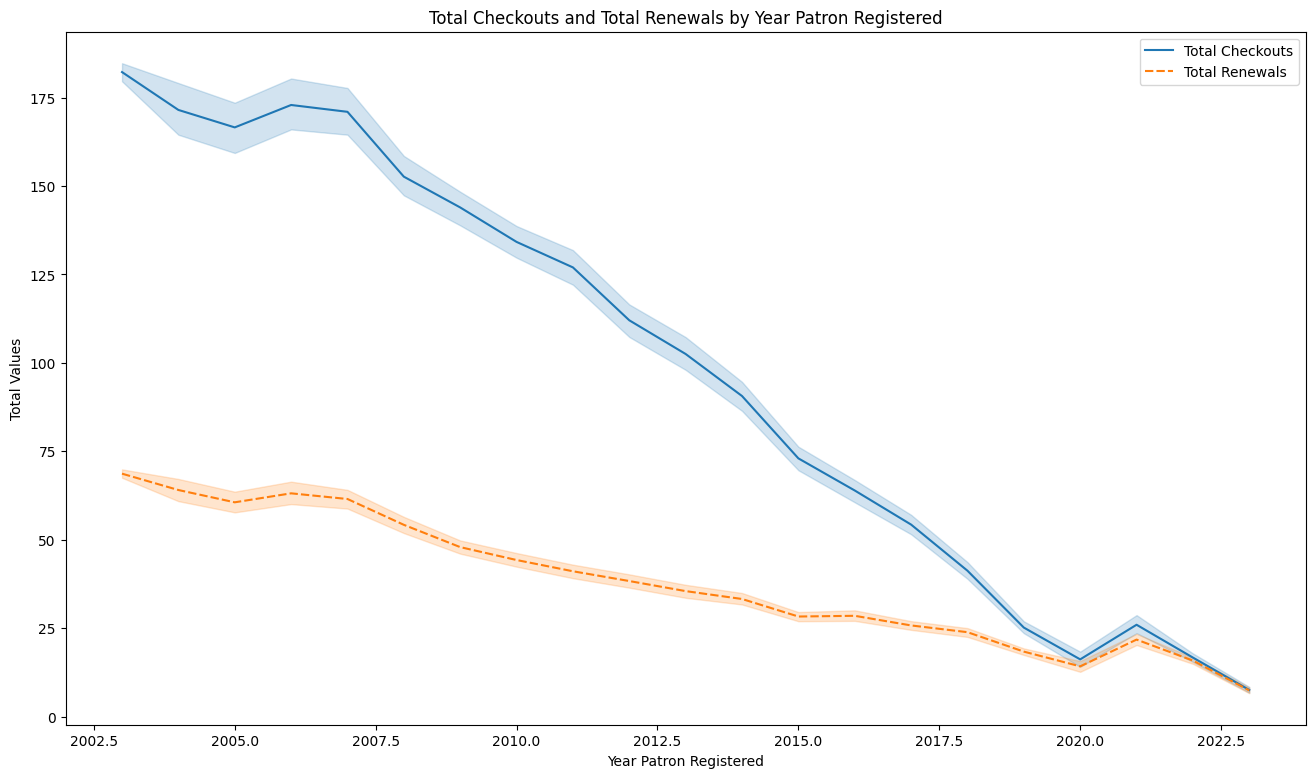

In [15]:
# Chọn các cột cần thiết
df = data[['Year Patron Registered','Total Checkouts','Total Renewals']]

# Đặt cột 'Year Patron Registered' làm chỉ mục (index)
ddf = df.set_index(['Year Patron Registered'])

# Chuyển đổi 'Year Patron Registered' sang kiểu dữ liệu thời gian nếu cần
# ddf.index = pd.to_datetime(ddf.index, format='%Y')  # Nếu cần xử lý thời gian

# Vẽ biểu đồ đường cho các cột 'Total Checkouts' và 'Total Renewals'
plt.figure(figsize=(16, 9))
sns.lineplot(data=ddf)
plt.title("Total Checkouts and Total Renewals by Year Patron Registered")
plt.xlabel("Year Patron Registered")
plt.ylabel("Total Values")
plt.show()

In [16]:
# Xu hướng giảm chung: Cả tổng số lượt mượn và gia hạn đều có xu hướng giảm dần theo thời gian. Điều này cho thấy số lượng người mượn sách và nhu cầu gia hạn sách đang giảm.
# Lượt mượn giảm mạnh hơn: Đường biểu diễn tổng số lượt mượn có độ dốc giảm rõ rệt hơn so với đường biểu diễn tổng số lượt gia hạn. 
# Điều này cho thấy sự sụt giảm về số lượng người mượn sách mới là nguyên nhân chính dẫn đến việc giảm tổng số lượt mượn và gia hạn
# Biến động nhẹ: Mặc dù có xu hướng giảm chung, nhưng cả hai đường biểu diễn đều có những biến động nhẹ trong một số năm nhất định. Điều này cho thấy có thể có những yếu tố khác tác động đến số liệu này, ngoài xu hướng giảm chung

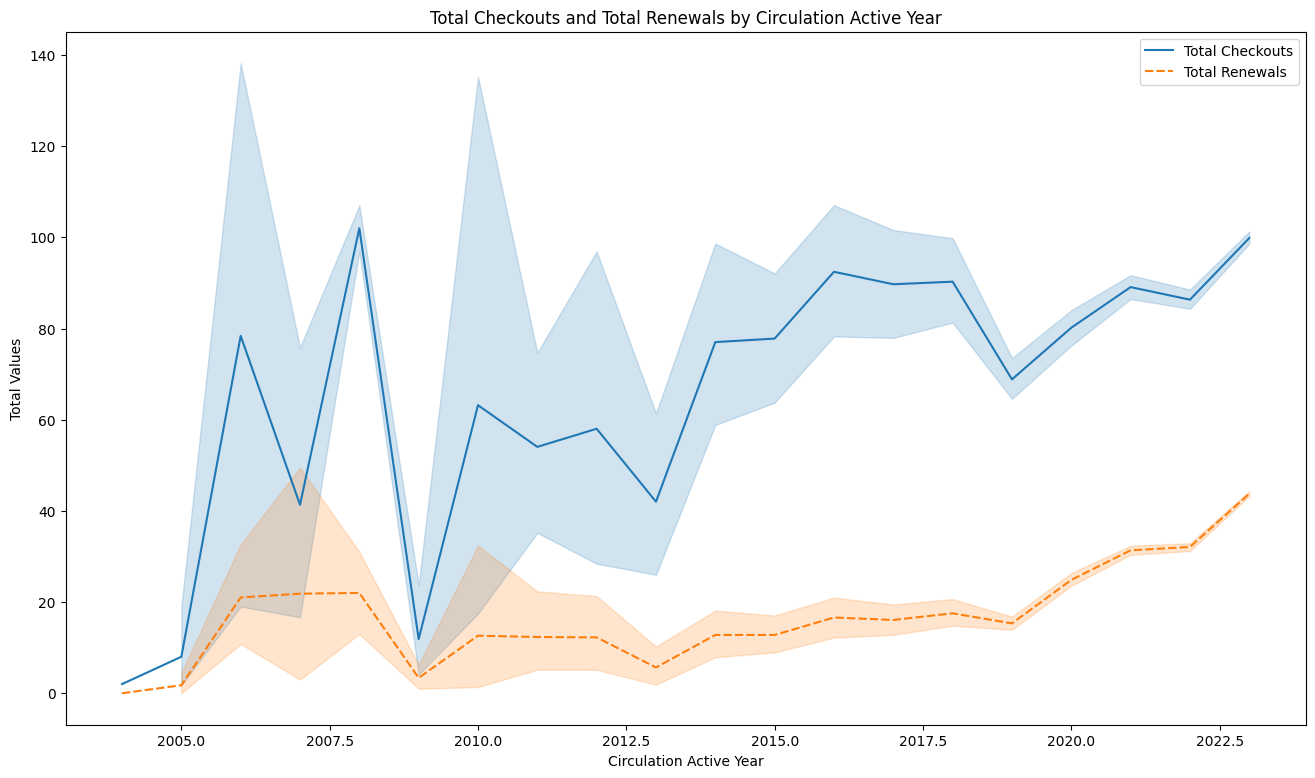

In [29]:
# Chọn các cột cần thiết
df = data[['Circulation Active Year','Total Checkouts','Total Renewals']]

# Đặt cột 'Circulation Active Year' làm chỉ mục (index)
ddf = df.set_index(['Circulation Active Year'])

# Chuyển đổi 'Year Patron Registered' sang kiểu dữ liệu thời gian nếu cần
# ddf.index = pd.to_datetime(ddf.index, format='%Y')  # Nếu cần xử lý thời gian

# Vẽ biểu đồ đường cho các cột 'Total Checkouts' và 'Total Renewals'
plt.figure(figsize=(16, 9))
sns.lineplot(data=ddf)
plt.title("Total Checkouts and Total Renewals by Circulation Active Year")
plt.xlabel("Circulation Active Year")
plt.ylabel("Total Values")
plt.show()

In [18]:
# Biến động lớn: Khác với biểu đồ trước đó, biểu đồ này cho thấy số lượng lượt mượn và gia hạn có sự biến động rất lớn theo từng năm. Không có xu hướng giảm dần rõ ràng như biểu đồ trước.
# Lượt mượn cao hơn lượt gia hạn: Nhìn chung, số lượt mượn luôn cao hơn số lượt gia hạn, cho thấy có nhiều người đến thư viện mượn sách mới hơn là gia hạn những cuốn sách đã mượn.
# Các đỉnh và đáy: Biểu đồ xuất hiện nhiều đỉnh và đáy, cho thấy có những thời kỳ nhu cầu mượn sách tăng cao đột biến và cũng có những thời kỳ nhu cầu giảm mạnh.

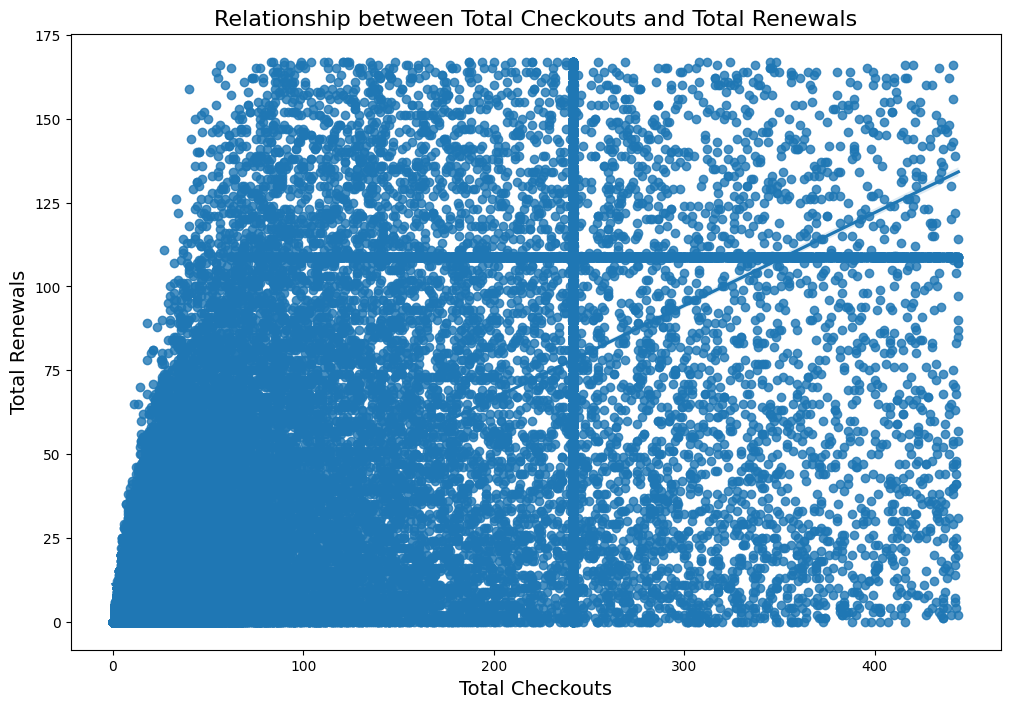

In [19]:
# Để xác nhận điều trên, có một mối quan hệ trực tiếp giữa 'Total Checkouts' and 'Total Renewals'
plt.figure(figsize=(12, 8))
sns.regplot(x=data['Total Checkouts'], y=data['Total Renewals'])
plt.title('Relationship between Total Checkouts and Total Renewals', fontsize=16)
plt.xlabel('Total Checkouts', fontsize=14)
plt.ylabel('Total Renewals', fontsize=14)
plt.show()

In [20]:
# Phân bố dữ liệu: Dữ liệu phân bố khá dày đặc và có xu hướng tập trung ở các giá trị thấp của cả hai trục. Điều này cho thấy rằng phần lớn các lần mượn sách và gia hạn đều nằm ở mức thấp
# Mối quan hệ: Không có mối quan hệ rõ ràng giữa "Total Checkouts" và "Total Renewals". Dữ liệu phân bố khá ngẫu nhiên và không có xu hướng tăng hoặc giảm rõ ràng
# Điểm đặc biệt: Có một số điểm dữ liệu nằm ở các giá trị cao của cả hai trục, nhưng chúng không nhiều và không tạo thành một xu hướng rõ ràng
# => Một số người có thể mượn sách nhiều lần nhưng không gia hạn, trong khi những người khác có thể mượn ít nhưng gia hạn nhiều lần

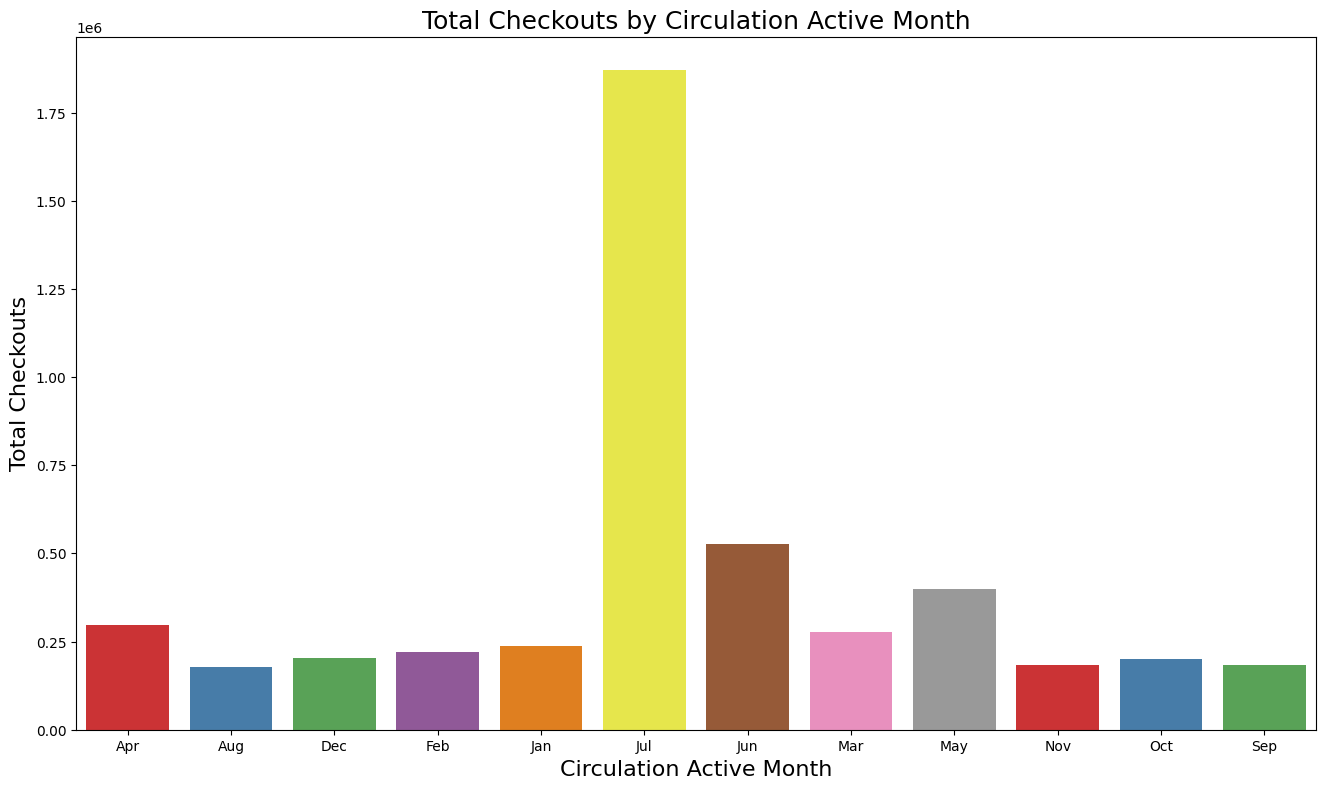

In [21]:
# Nhóm theo tháng và tính tổng 'Total Checkouts' cho mỗi tháng
df_monthly_checkouts = data.groupby('Circulation Active Month')['Total Checkouts'].sum().reset_index()

# Vẽ biểu đồ thanh
plt.figure(figsize=(16, 9))
sns.barplot(x='Circulation Active Month', y='Total Checkouts', data=df_monthly_checkouts, palette='Set1')

# Thêm tiêu đề và nhãn
plt.title("Total Checkouts by Circulation Active Month", fontsize=18)
plt.xlabel("Circulation Active Month", fontsize=16)
plt.ylabel("Total Checkouts", fontsize=16)
plt.show()


In [22]:
print(data["Circulation Active Month"].value_counts())

Circulation Active Month
Jul    17501
Jun     6037
May     4427
Apr     3377
Mar     3249
Jan     2908
Feb     2775
Dec     2415
Oct     2324
Sep     2129
Nov     2104
Aug     2052
Name: count, dtype: int64


In [23]:
#Tháng 7 là tháng có giá trị cao nhất trong 'Tổng số lần mượn sách' và tháng 8 là tháng có giá trị thấp nhất.
# Số lượng sách được mượn trong các tháng còn lại có sự chênh lệch đáng kể

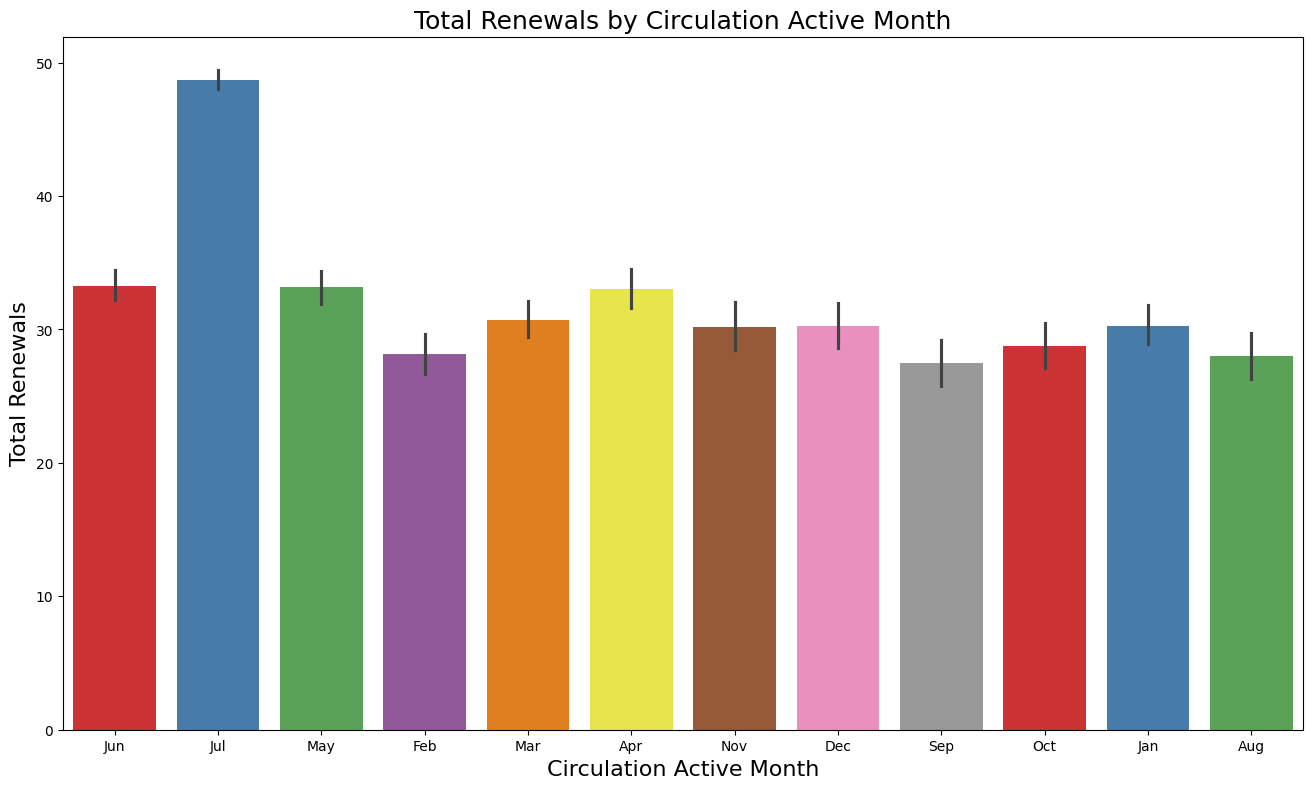

In [24]:
plt.figure(figsize=(16, 9))
sns.barplot(x='Circulation Active Month', y='Total Renewals', data=data, palette='Set1')
plt.title("Total Renewals by Circulation Active Month", fontsize=18)
plt.xlabel("Circulation Active Month", fontsize=16)
plt.ylabel("Total Renewals", fontsize=16)
plt.show()



In [25]:
#Tương tự như Tổng số lần mượn sách

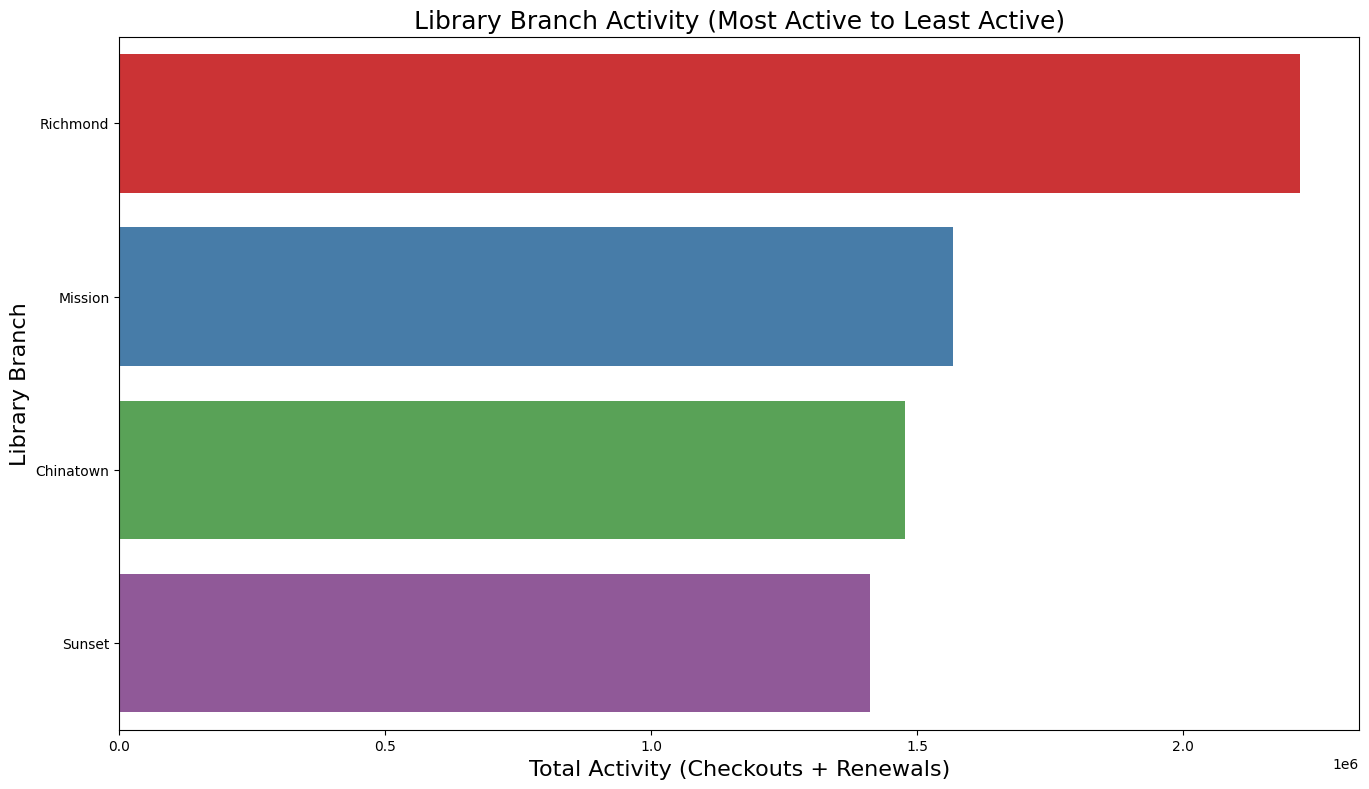

In [26]:
# Nhóm theo 'Home Library Definition' và tính tổng hoạt động
library_activity = data.groupby('Home Library Definition')[['Total Checkouts', 'Total Renewals']].sum().reset_index()

# Tạo thêm cột 'Total Activity' để tổng hợp hoạt động
library_activity['Total Activity'] = library_activity['Total Checkouts'] + library_activity['Total Renewals']

# Sắp xếp thư viện theo tổng hoạt động giảm dần
library_activity = library_activity.sort_values('Total Activity', ascending=False)

# Vẽ biểu đồ thanh
plt.figure(figsize=(16, 9))
sns.barplot(
    x='Total Activity',
    y='Home Library Definition',
    data=library_activity,
    palette='Set1'
)
plt.title("Library Branch Activity (Most Active to Least Active)", fontsize=18)
plt.xlabel("Total Activity (Checkouts + Renewals)", fontsize=16)
plt.ylabel("Library Branch", fontsize=16)
plt.show()


In [27]:
# In dữ liệu ra dưới dạng bảng
print("Library Branch Activity:")
print(library_activity)


print("\nTop  Most Active Library Branches:")
print(library_activity.head(4))

Library Branch Activity:
  Home Library Definition  Total Checkouts  Total Renewals  Total Activity
2                Richmond     1.574594e+06   644833.626131    2.219428e+06
1                 Mission     1.107665e+06   458505.025378    1.566170e+06
0               Chinatown     1.107467e+06   369224.183364    1.476691e+06
3                  Sunset     9.864208e+05   424148.941900    1.410570e+06

Top  Most Active Library Branches:
  Home Library Definition  Total Checkouts  Total Renewals  Total Activity
2                Richmond     1.574594e+06   644833.626131    2.219428e+06
1                 Mission     1.107665e+06   458505.025378    1.566170e+06
0               Chinatown     1.107467e+06   369224.183364    1.476691e+06
3                  Sunset     9.864208e+05   424148.941900    1.410570e+06


In [28]:
#Richmond: Đây là thư viện hoạt động nhiều nhất, với tổng hoạt động vượt trội hơn so với các chi nhánh khác. Điều này cho thấy Richmond có lượng người sử dụng lớn, cả về mượn sách lẫn gia hạn.
#Mission và Chinatown: Cả hai chi nhánh này có mức độ hoạt động tương đương nhau, nhưng Mission có lượng gia hạn cao hơn, trong khi Chinatown chủ yếu tập trung vào mượn sách.
#Sunset: Tuy có tổng hoạt động thấp hơn các thư viện trên, nhưng vẫn duy trì lượng người dùng ổn định.